# Spotify's Top 2000 songs


## Introduction

Artists have been making hit songs for as long as music has been around. With several platforms to reach ever changing audiences, music has a potential for the largest audience exposure. 

If we look at popular songs over the past 70 years and compare them with a songs popularity today, we may be able to gain some insight into what makes songs popular. Potentially, we will be able to make recommendations to producers, and musicians alike to some formula for a successful song. We can answer interesting questions like "What makes a hit song?" and "What genre is the most popular?" or "Does danceability in a song make it more popular than acoustic songs?".

We will focus on one music platform with a lot of music data, Spotify. This platform is an informative tool for new and emerging artist, listeners and artists from all genres. It allows listeners to generate playlists, find favorite songs and discover new artists. We will review the current statistics of popular songs to see what trends have staying power. 

__*Do popular songs from the last twenty years have more danceability than songs before 2000?*__

## Hypothesis

Ho: There is no significant difference between a songs dancability 20 years ago and a songs current average popularity.

Ha: There is a significant difference between a songs dancability 20 years ago and  a songs current average popularity.

## Data
This dataset (found on Kaggle [here](https://www.kaggle.com/iamsumat/spotify-top-2000s-mega-dataset#Spotify-2000.csv)) contains audio statistics of the top 2000 tracks on Spotify with release dates between 1956 to 2019. The data has 15 columns and 1994 columns describing a track and it's audio features like Danceability, Liveness, Length and Popularity.


* Index: ID
* Title: Name of the Track
* Artist: Name of the Artist
* Top Genre: Genre of the track
* Year: Release Year of the track
* Beats per Minute(BPM): The tempo of the song
* Energy: The energy of a song - the higher the value, the more energtic. song
* Danceability: The higher the value, the easier it is to dance to this song.
* Loudness: The higher the value, the louder the song.
* Valence: The higher the value, the more positive mood for the song.
* Length: The duration of the song.
* Acoustic: The higher the value the more acoustic the song is.
* Speechiness: The higher the value the more spoken words the song contains
* Popularity: The higher the value the more popular the song is.

In [0]:
from google.colab import drive 
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from scipy import stats
import math

In [0]:
spotify2000= pd.read_csv('/content/drive/My Drive/Thinkful/CapstoneProjects/Spotify-2000.csv', index_col=0)

spotify2000.info()
spotify2000.head()
spotify2000.describe()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1994 entries, 1 to 1994
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Title                   1994 non-null   object
 1   Artist                  1994 non-null   object
 2   Top Genre               1994 non-null   object
 3   Year                    1994 non-null   int64 
 4   Beats Per Minute (BPM)  1994 non-null   int64 
 5   Energy                  1994 non-null   int64 
 6   Danceability            1994 non-null   int64 
 7   Loudness (dB)           1994 non-null   int64 
 8   Liveness                1994 non-null   int64 
 9   Valence                 1994 non-null   int64 
 10  Length (Duration)       1994 non-null   object
 11  Acousticness            1994 non-null   int64 
 12  Speechiness             1994 non-null   int64 
 13  Popularity              1994 non-null   int64 
dtypes: int64(10), object(4)
memory usage: 233.7+ KB


,Year,Beats Per Minute (BPM),Energy,Danceability,Loudness (dB),Liveness,Valence,Acousticness,Speechiness,Popularity
count,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.00000
mean,1992.992979,120.215647,59.679539,53.238215,-9.008526,19.012036,49.408726,28.858074,4.994985,59.52658
std,16.116048,28.028096,22.154322,15.351507,3.647876,16.727378,24.858212,29.011986,4.401566,14.35160
min,1956.000000,37.000000,3.000000,10.000000,-27.000000,2.000000,3.000000,0.000000,2.000000,11.00000
25%,1979.000000,99.000000,42.000000,43.000000,-11.000000,9.000000,29.000000,3.000000,3.000000,49.25000
50%,1993.000000,119.000000,61.000000,53.000000,-8.000000,12.000000,47.000000,18.000000,4.000000,62.00000
75%,2007.000000,136.000000,78.000000,64.000000,-6.000000,23.000000,69.750000,50.000000,5.000000,71.00000
max,2019.000000,206.000000,100.000000,96.000000,-2.000000,99.000000,99.000000,99.000000,55.000000,100.00000


In [0]:
spotify2000.shape

(1994, 14)

## 4. Methods

For this analysis I will create two DataFrames, one containing all for songs from before 2000 and the second will include all songs post 2000. Comparing these two groupd we will test the danceability and compare the average of two distibutions to see if we songs are more danceable now or 20+ years ago.

If the distributions of sales appear to be close to normally distributed based on their histograms, skewness and kurtosis, I wil conduct an independent samples t-test between the groups at the two-tail, 95% confidence interval. 

In [0]:
songs_before_2000 = spotify2000[spotify2000['Year'] < 2000]

songs_after_2000 = spotify2000[spotify2000['Year'] >= 2000]

In [0]:
songs_after_2000.head()

,Title,Artist,Top Genre,Year,Beats Per Minute (BPM),Energy,Danceability,Loudness (dB),Liveness,Valence,Length (Duration),Acousticness,Speechiness,Popularity
Index,,,,,,,,,,,,,,
1,Sunrise,Norah Jones,adult standards,2004,157,30,53,-14,11,68,201,94,3,71
2,Black Night,Deep Purple,album rock,2000,135,79,50,-11,17,81,207,17,7,39
3,Clint Eastwood,Gorillaz,alternative hip hop,2001,168,69,66,-9,7,52,341,2,17,69
4,The Pretender,Foo Fighters,alternative metal,2007,173,96,43,-4,3,37,269,0,4,76
5,Waitin' On A Sunny Day,Bruce Springsteen,classic rock,2002,106,82,58,-5,10,87,256,1,3,59


In [0]:
songs_before_2000.head()

,Title,Artist,Top Genre,Year,Beats Per Minute (BPM),Energy,Danceability,Loudness (dB),Liveness,Valence,Length (Duration),Acousticness,Speechiness,Popularity
Index,,,,,,,,,,,,,,
800,Child in Time,Deep Purple,album rock,1970,127,46,34,-11,9,35,620,17,4,45
801,Let It Be - Remastered 2009,The Beatles,british invasion,1970,143,40,44,-8,11,41,243,63,3,79
802,Bridge Over Troubled Water,Simon & Garfunkel,classic rock,1970,80,21,15,-14,12,26,293,82,3,71
803,Paranoid - 2016 Remaster,Black Sabbath,album rock,1970,163,66,42,-12,18,45,168,0,7,68
804,Have You Ever Seen The Rain,Creedence Clearwater Revival,album rock,1970,116,47,74,-13,19,89,160,9,3,71


In [0]:
print(songs_before_2000.shape)
print(songs_after_2000.shape)

(1195, 14)
(799, 14)


*These data sets seem to have a pretty good split with enough data in each to evaluate more thoroughly.*

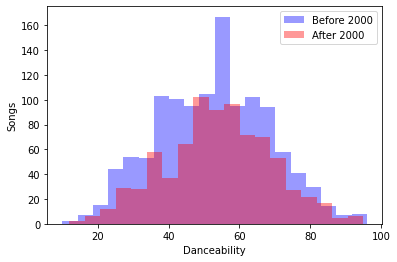

In [0]:
sns.distplot(songs_before_2000['Danceability'], kde=False, color='blue', label = "Before 2000")
sns.distplot(songs_after_2000['Danceability'], kde=False, color= 'red', label= "After 2000")
plt.ylabel('Songs')
plt.xlabel('Danceability')
plt.legend()
plt.savefig('Danceability.png')
plt.show()

In [0]:
print(stats.describe(songs_before_2000['Danceability']))
print(stats.describe(songs_after_2000['Danceability']))

DescribeResult(nobs=1195, minmax=(10, 96), mean=52.67196652719665, variance=242.7449002333845, skewness=0.05913775120055088, kurtosis=-0.39310951518338033)
DescribeResult(nobs=799, minmax=(12, 95), mean=54.08510638297872, variance=224.17821148616216, skewness=-0.044049693500138376, kurtosis=-0.250223869744187)


*Both sets seem to be normally distributed, let's see what else we can pull from the data.*

In [0]:
stats.ttest_ind(songs_before_2000['Danceability'], songs_after_2000['Danceability'])

Ttest_indResult(statistic=-2.015869667949944, pvalue=0.04394763785745334)

In [0]:
stats.f_oneway(songs_before_2000['Danceability'], songs_after_2000['Danceability'])

F_onewayResult(statistic=4.063730518160619, pvalue=0.043947637857453065)

In [0]:
# Confidence interval
def get_95_ci(array_1, array_2):
    sample_1_n = array_1.shape[0]
    sample_2_n = array_2.shape[0]
    sample_1_mean = array_1.mean()
    sample_2_mean = array_2.mean()
    sample_1_var = array_1.var()
    sample_2_var = array_2.var()
    mean_difference = sample_2_mean - sample_1_mean
    std_err_difference = math.sqrt((sample_1_var/sample_1_n)+(sample_2_var/sample_2_n))
    margin_of_error = 1.96 * std_err_difference
    ci_lower = mean_difference - margin_of_error
    ci_upper = mean_difference + margin_of_error
    return("The difference in means at the 95% confidence interval (two-tail) is between "+str(ci_lower)+" and "+str(ci_upper)+".")

print(get_95_ci(songs_before_2000['Danceability'], songs_after_2000['Danceability']))
print(songs_before_2000['Danceability'].mean())

The difference in means at the 95% confidence interval (two-tail) is between 0.04997811879847247 and 2.776301592765668.
52.67196652719665


## 5. Results

Based on a visual inspection, the danceability for both groups was considerably normally distributed so I proceeded with the t-test. Based on a p-value of .043, I reject the null that there is no significant difference in means. 


## 6. Discusion & Recommendation
Danceability on average was higher before the year 2000, however a hit song may not be dance worthy any longer. However, it at first glance, older songs with high danceability have staying power and continue to be in the most popular songs. As a next step we should so some additional exploritory analysis on the data to see if older songs that are still popular have higher values in other areas like energy, or bpm. Before we can design an algorithm for a successful song, we need to know why some songs maintain their popularity. Perhaps we can evaluate if these songs make us feel nostalgia, happy, or pensive. Linking a song to it's emotive state may be a new key to a song with staying power.

In [0]:
songs_after_2000.corr()

,Year,Beats Per Minute (BPM),Energy,Danceability,Loudness (dB),Liveness,Valence,Acousticness,Speechiness,Popularity
Year,1.000000,-0.023680,-0.065945,0.052403,-0.021536,-0.029269,-0.000245,0.034711,0.033513,-0.039250
Beats Per Minute (BPM),-0.023680,1.000000,0.155330,-0.148481,0.094070,0.049984,-0.015301,-0.178712,0.124936,0.000913
Energy,-0.065945,0.155330,1.000000,0.147345,0.722387,0.166525,0.389045,-0.722674,0.212471,0.119782
Danceability,0.052403,-0.148481,0.147345,1.000000,0.048831,-0.090156,0.505520,-0.121657,0.166519,0.216115
Loudness (dB),-0.021536,0.094070,0.722387,0.048831,1.000000,0.056887,0.151242,-0.516029,0.117476,0.299710
Liveness,-0.029269,0.049984,0.166525,-0.090156,0.056887,1.000000,0.066738,-0.037294,0.131152,-0.113456
Valence,-0.000245,-0.015301,0.389045,0.505520,0.151242,0.066738,1.000000,-0.231584,0.152413,-0.005892
Acousticness,0.034711,-0.178712,-0.722674,-0.121657,-0.516029,-0.037294,-0.231584,1.000000,-0.097804,-0.112639
Speechiness,0.033513,0.124936,0.212471,0.166519,0.117476,0.131152,0.152413,-0.097804,1.000000,0.177402
Popularity,-0.039250,0.000913,0.119782,0.216115,0.299710,-0.113456,-0.005892,-0.112639,0.177402,1.000000


In [0]:
songs_before_2000.corr()

,Year,Beats Per Minute (BPM),Energy,Danceability,Loudness (dB),Liveness,Valence,Acousticness,Speechiness,Popularity
Year,1.000000,-0.023311,0.156426,0.083869,0.163735,0.013533,-0.160315,-0.215786,-0.004445,-0.161324
Beats Per Minute (BPM),-0.023311,1.000000,0.154160,-0.138061,0.086430,-0.010229,0.116179,-0.079194,0.050697,-0.000284
Energy,0.156426,0.154160,1.000000,0.128485,0.760511,0.177858,0.446511,-0.626455,0.194549,0.121333
Danceability,0.083869,-0.138061,0.128485,1.000000,0.022241,-0.114237,0.536465,-0.140946,0.090829,0.097973
Loudness (dB),0.163735,0.086430,0.760511,0.022241,1.000000,0.120883,0.227845,-0.430655,0.111804,0.176985
Liveness,0.013533,-0.010229,0.177858,-0.114237,0.120883,1.000000,0.045036,-0.050537,0.057621,-0.108512
Valence,-0.160315,0.116179,0.446511,0.536465,0.227845,0.045036,1.000000,-0.263479,0.089127,0.162046
Acousticness,-0.215786,-0.079194,-0.626455,-0.140946,-0.430655,-0.050537,-0.263479,1.000000,-0.092331,-0.083158
Speechiness,-0.004445,0.050697,0.194549,0.090829,0.111804,0.057621,0.089127,-0.092331,1.000000,0.058094
Popularity,-0.161324,-0.000284,0.121333,0.097973,0.176985,-0.108512,0.162046,-0.083158,0.058094,1.000000


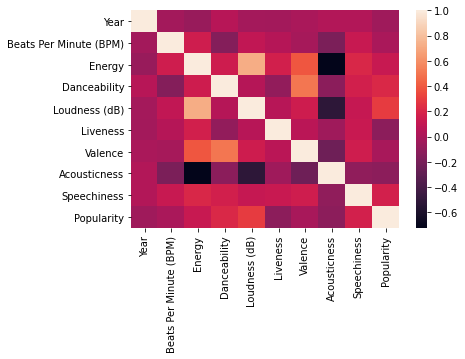

In [0]:
sns.heatmap(songs_after_2000.corr())

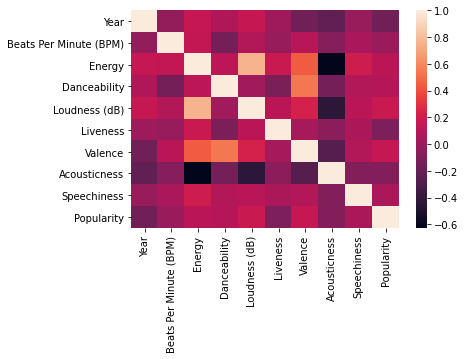

In [0]:
sns.heatmap(songs_before_2000.corr())

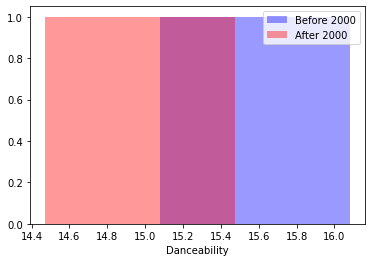

In [0]:
sns.distplot(songs_before_2000['Danceability'].std(), kde=False, color='blue', label = "Before 2000")
sns.distplot(songs_after_2000['Danceability'].std(), kde=False, color= 'red', label= "After 2000")
plt.xlabel('Danceability')
plt.legend()
plt.savefig('Danceability.png')
plt.show()

(array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.]),
 array([53.58510638, 53.68510638, 53.78510638, 53.88510638, 53.98510638,
        54.08510638, 54.18510638, 54.28510638, 54.38510638, 54.48510638,
        54.58510638]),
 <a list of 10 Patch objects>)

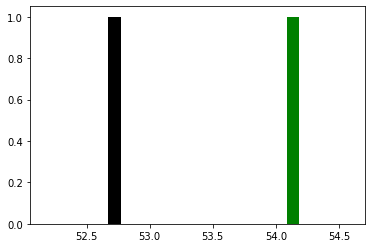

In [0]:
plt.hist(songs_before_2000['Danceability'].mean(), color='Black')
plt.hist(songs_after_2000['Danceability'].mean(), color="green")

In [0]:
songs_after_2000.describe()

,Year,Beats Per Minute (BPM),Energy,Danceability,Loudness (dB),Liveness,Valence,Acousticness,Speechiness,Popularity
count,799.000000,799.000000,799.000000,799.000000,799.000000,799.000000,799.000000,799.000000,799.000000,799.000000
mean,2009.602003,121.217772,62.735920,54.085106,-7.515645,19.455569,45.644556,26.458073,5.317897,57.440551
std,5.567701,28.673473,21.071821,14.972582,2.915595,17.526141,23.932577,29.545902,4.829324,16.812281
min,2000.000000,49.000000,5.000000,12.000000,-21.000000,2.000000,4.000000,0.000000,2.000000,12.000000
25%,2005.000000,100.000000,47.000000,44.000000,-9.000000,10.000000,26.000000,2.000000,3.000000,45.000000
50%,2009.000000,120.000000,66.000000,54.000000,-7.000000,12.000000,42.000000,12.000000,4.000000,59.000000
75%,2014.000000,138.000000,79.000000,64.500000,-5.000000,22.000000,64.000000,48.000000,5.000000,71.000000
max,2019.000000,205.000000,99.000000,95.000000,-2.000000,99.000000,98.000000,99.000000,46.000000,100.000000


In [0]:
songs_before_2000.describe()

,Year,Beats Per Minute (BPM),Energy,Danceability,Loudness (dB),Liveness,Valence,Acousticness,Speechiness,Popularity
count,1195.000000,1195.000000,1195.000000,1195.000000,1195.000000,1195.000000,1195.000000,1195.000000,1195.000000,1195.000000
mean,1981.887866,119.545607,57.635983,52.671967,-10.006695,18.715481,51.925523,30.462762,4.779079,60.921339
std,10.236523,27.579947,22.628910,15.580273,3.747243,16.172004,25.155736,28.549482,4.078550,12.248700
min,1956.000000,37.000000,3.000000,10.000000,-27.000000,2.000000,3.000000,0.000000,2.000000,11.000000
25%,1973.000000,99.000000,40.000000,41.000000,-12.000000,9.000000,31.000000,5.000000,3.000000,53.000000
50%,1982.000000,119.000000,58.000000,53.000000,-10.000000,13.000000,51.000000,21.000000,4.000000,63.000000
75%,1991.000000,135.000000,76.000000,64.000000,-7.000000,23.000000,73.000000,51.000000,5.000000,70.000000
max,1999.000000,206.000000,100.000000,96.000000,-2.000000,99.000000,99.000000,98.000000,55.000000,95.000000


In [0]:
spotify2000['Danceability'].describe()

count    1994.000000
mean       53.238215
std        15.351507
min        10.000000
25%        43.000000
50%        53.000000
75%        64.000000
max        96.000000
Name: Danceability, dtype: float64

In [0]:
songs_after_2000['Danceability'].describe()

count    799.000000
mean      54.085106
std       14.972582
min       12.000000
25%       44.000000
50%       54.000000
75%       64.500000
max       95.000000
Name: Danceability, dtype: float64

In [0]:
songs_before_2000['Danceability'].describe()

count    1195.000000
mean       52.671967
std        15.580273
min        10.000000
25%        41.000000
50%        53.000000
75%        64.000000
max        96.000000
Name: Danceability, dtype: float64

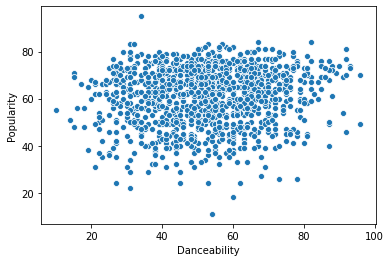

In [0]:
sns.scatterplot(x='Danceability', y= 'Popularity', data= songs_before_2000)

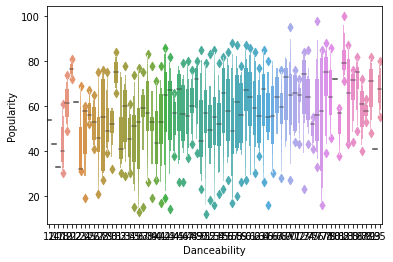

In [0]:
sns.boxenplot(x="Danceability", y='Popularity', data= songs_after_2000)

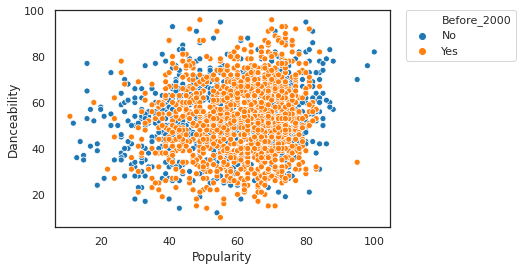

In [0]:
sns.set_style('white')
sns.set_context('notebook')

songs2 = spotify2000.copy()

songs2['Before_2000'] = np.where(spotify2000['Year']< 2000, 'Yes', 'No')
sns.scatterplot(y='Danceability', x='Popularity', hue='Before_2000', data= songs2)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

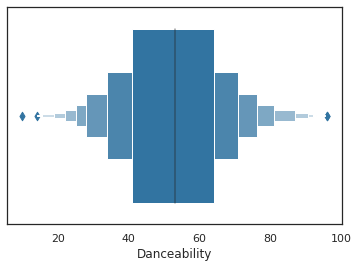

In [0]:
sns.boxenplot(x='Danceability', data= songs_before_2000)

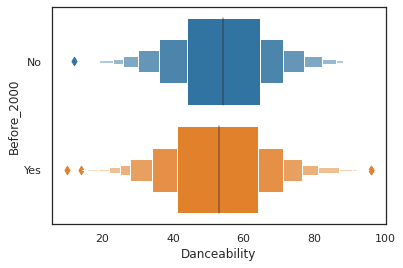

In [0]:
sns.boxenplot(x='Danceability', y="Before_2000", data= songs2, )